# **VIKRAM SAINI**

# Stores sales prediction using machine learning algorithms

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

#from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import confusion_matrix,precision_score
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from mpl_toolkits.mplot3d import Axes3D

## 2. Import Dataset

In [2]:
df = pd.read_csv("C:/Users/Amit Kumar Saini/Desktop/iNeuron Internship/Train.csv")
df.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7643,FDZ31,15.35,Regular,0.113678,Fruits and Vegetables,189.7504,OUT018,2009,Medium,Tier 3,Supermarket Type2,2492.7552
6560,NCT17,10.80,Low Fat,0.041866,Health and Hygiene,189.7214,OUT046,1997,Small,Tier 1,Supermarket Type1,5841.0634
1635,FDO40,17.10,Low Fat,0.032679,Frozen Foods,150.7392,OUT049,1999,Medium,Tier 1,Supermarket Type1,3131.9232


In [3]:
#df_test = pd.read_csv("C:/Users/Amit Kumar Saini/Desktop/iNeuron Internship/Test.csv")

### Shape of dataset

In [4]:
df.shape

(8523, 12)

### ProfileReport

In [5]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

In [6]:
print(df.info()),print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Item_Identifier              1559
Item_W

(None, None)

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Extract numeric and categorical columns from dataset**

In [8]:
#Extract numerical and categorical columns from dataset
num_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'float64':
        num_col.append(x)
print('Numerical col = ', num_col)

cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
        cat_col.append(x)
print('Categorical col= ', cat_col)

Numerical col =  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
Categorical col=  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [9]:
df.Item_Fat_Content.value_counts()
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',}},inplace=True)
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## 3. Data preparation

### 3.1 Exploratory Data Analysis(EDA)

**Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.**

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

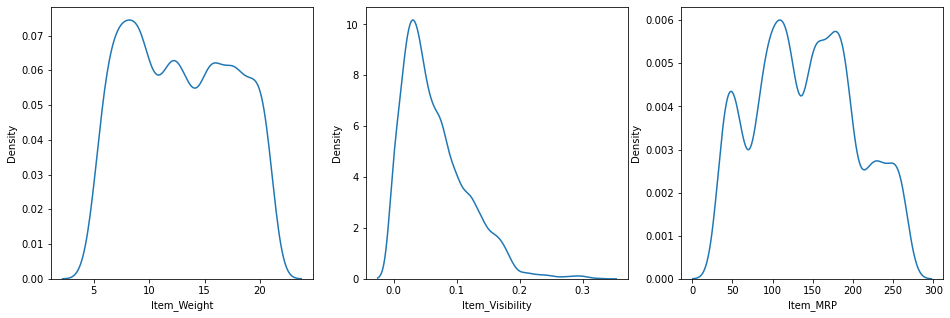

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.kdeplot(df["Item_Weight"])
plt.subplot(1,3,2)
sns.kdeplot(df["Item_Visibility"])
plt.subplot(1,3,3)
sns.kdeplot(df["Item_MRP"])

**Here we see that the item weight maximum lie between 5 to 20.**

**Graph show that item visibility is skewned.** 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

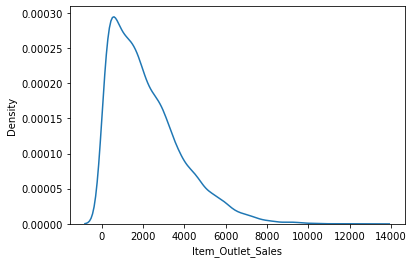

In [11]:
sns.kdeplot(df.Item_Outlet_Sales)

Text(0.5, 1.0, 'Top 5 item type')

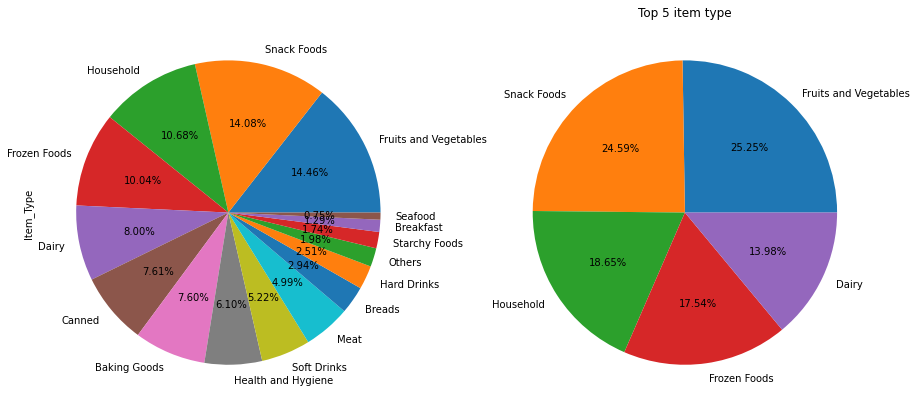

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
df['Item_Type'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.subplot(1,2,2)
Item_Type_name = df.Item_Type.value_counts().index
Item_Type_Value = df.Item_Type.value_counts().values
plt.pie(Item_Type_Value[:5],labels =Item_Type_name[:5],autopct='%1.2f%%')
plt.title('Top 5 item type')

**Observation - 
Mostly Customers buy fruits and vegetables.**

<AxesSubplot:ylabel='Outlet_Size'>

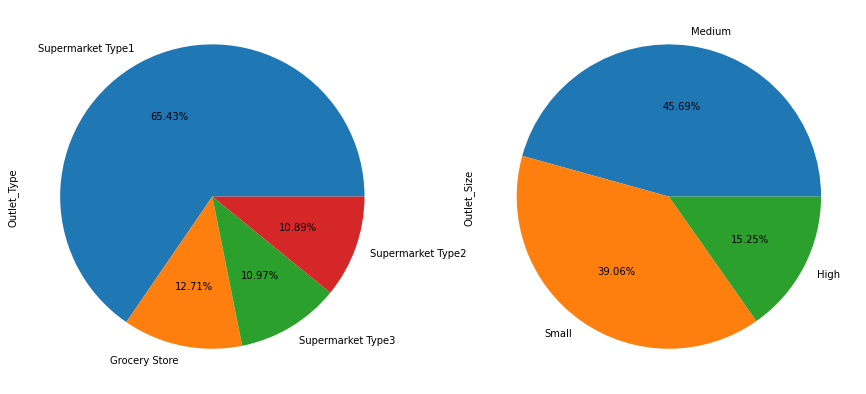

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
df.Outlet_Type.value_counts().plot(kind='pie',autopct='%1.2f%%')

plt.subplot(1,2,2)
df.Outlet_Size.value_counts().plot(kind='pie',autopct='%1.2f%%')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

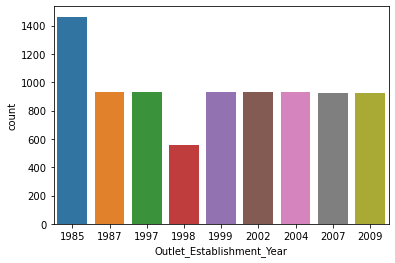

In [14]:
sns.countplot(x = df.Outlet_Establishment_Year)

**In year 1985 maximum outlet establish and in 1998 minimum.**

Text(0, 0.5, 'sales')

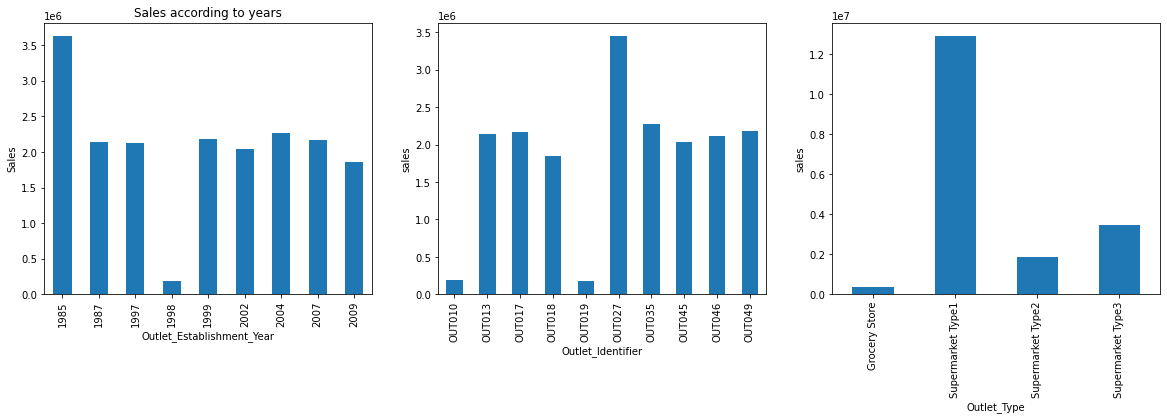

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().plot(kind = 'bar') #kind = line,pie,etc.
plt.ylabel('Sales')
plt.title('Sales according to years')
plt.subplot(1,3,2)
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().plot(kind='bar')
plt.ylabel('sales')
plt.subplot(1,3,3)
df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot(kind='bar')
plt.ylabel('sales')

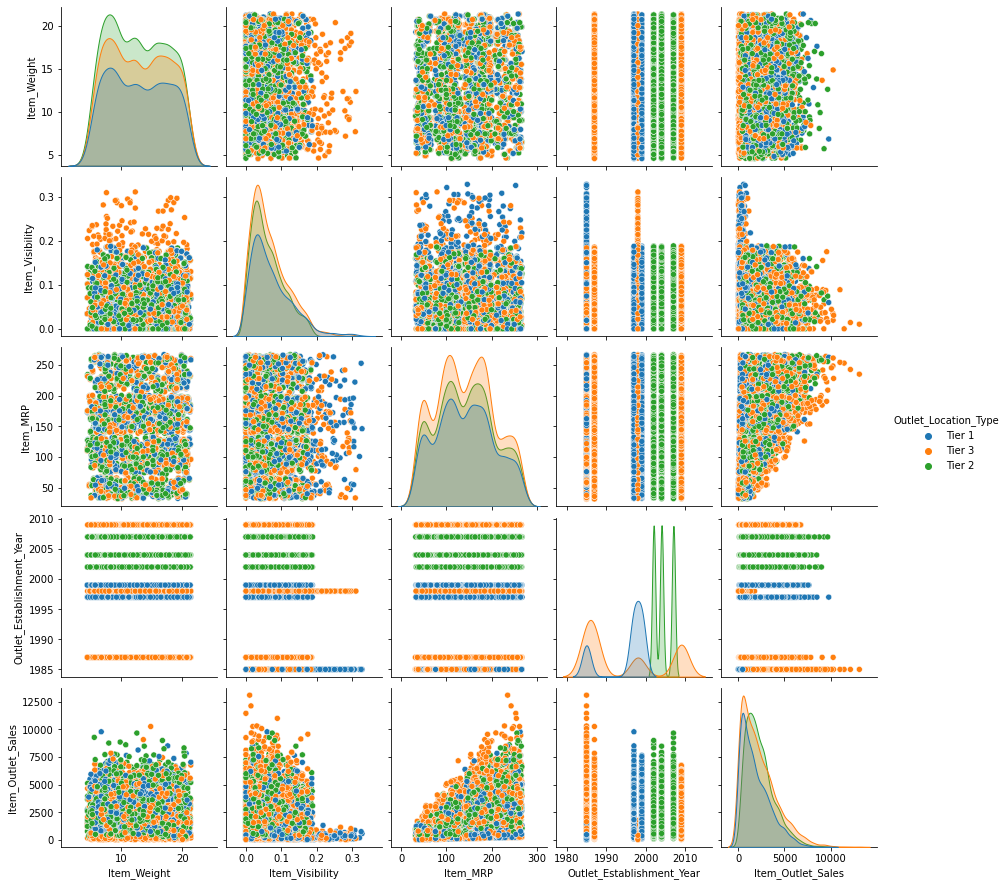

In [16]:
sns.pairplot(df,hue='Outlet_Location_Type')

### 3.2 Data preprocessing

#### 3.2.1 Check Outliers

<AxesSubplot:xlabel='Item_MRP'>

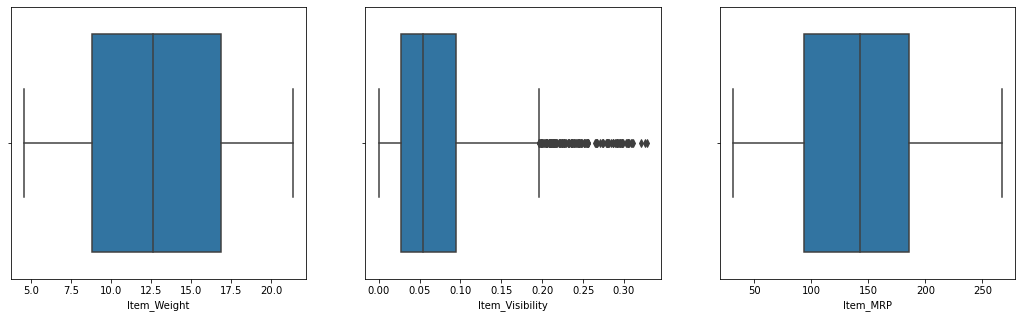

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.Item_Weight)
plt.subplot(1,3,2)
sns.boxplot(x=df.Item_Visibility)
plt.subplot(1,3,3)
sns.boxplot(x=df.Item_MRP)

**Here we see that in Item visibility column have outliers.**

In [18]:
#Finding the IQR
per25 = df.Item_Visibility.quantile(0.25)
per75 = df.Item_Visibility.quantile(0.75)
IQR = per75 - per25
upper_limit = per75 + 1.5 * IQR
lower_limit = per25 - 1.5 * IQR

#### Capping

In [19]:
df = df.copy()
df['Item_Visibility'] = np.where( df.Item_Visibility > upper_limit,
                               upper_limit,
                                np.where(df.Item_Visibility < lower_limit,
                                        lower_limit,
                                        df.Item_Visibility))

<AxesSubplot:xlabel='Item_Visibility'>

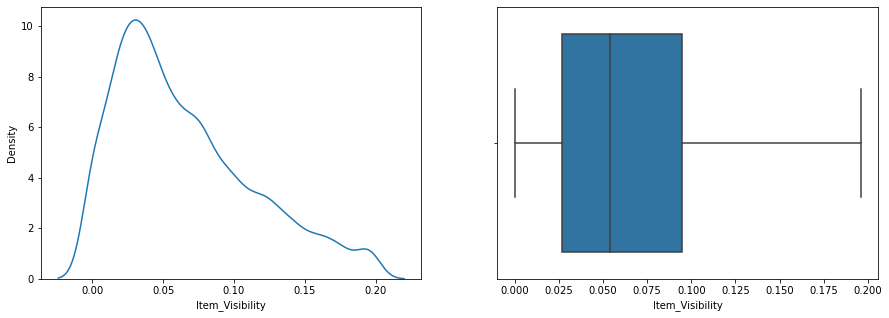

In [20]:
# after outlier capping
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df.Item_Visibility)
plt.subplot(1,2,2)
sns.boxplot(x =df.Item_Visibility)

####  3.2.2 Column transformer
1. Impute missing values
2. Encoding
3. StandardScaler

In [21]:
num_fea = ['Item_Weight']
cat_fea = ['Outlet_Size']
cat_fea1 = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type']
drop_fea = ['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier','Outlet_Location_Type']
passthrough_fea = ['Item_Outlet_Sales']
size_cat = ['Small','Medium','High']
num_st = ['Item_Visibility', 'Item_MRP']

In [22]:
ct = make_column_transformer(
                      (make_pipeline(SimpleImputer(),StandardScaler()),num_fea),
                        (make_pipeline (SimpleImputer(strategy='most_frequent'),
                                        OrdinalEncoder(categories=[size_cat])),cat_fea),
                           (StandardScaler(),num_st),
                           (OneHotEncoder(sparse=False,dtype=np.int32),cat_fea1),
                             ("passthrough", passthrough_fea),
                               ("drop", drop_fea),
                              )
ct

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']]))]),
                                 ['Outlet_Size']),
                                ('standardscaler', StandardScaler(),
                                 ['Item_Visibility', 'Item_MRP']),
                                ('onehotencoder',
                                 OneHotEncoder(dtype=<class 'numpy.int32'>,
                                               sparse=False),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Size', 'Outlet_Type']),
                                ('passthrough', 'passthrough',
                                 ['Item_Outlet_Sales']),
                                ('drop', 'drop',
                                 ['Item_Identifier',
                                  'Outlet_Establishment_Year',
                                  'Outlet_Identifier',
                                  'Outlet_Location_Type'])])

In [23]:
tras_ =  ct.fit_transform(df)

In [24]:
column_names = (num_fea + cat_fea + num_st
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()  + passthrough_fea  )

In [25]:
df = pd.DataFrame(tras_ ,columns=column_names)
df.head(3)

,Item_Weight,Outlet_Size,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,-0.841872,1.0,-1.008628,1.747454,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3735.1380
1,-1.641706,1.0,-0.942473,-1.489023,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,443.4228
2,1.098554,1.0,-0.994034,0.010040,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2097.2700


### 3.3 Data Splitting

#### Extract dependent and independent variables from datasets

In [26]:
x = df.iloc[:,:-1]
Y = df.iloc[:,-1]

#### Split dataset in train and test set

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(x, Y, test_size=0.30,random_state= 42)

## 4. Train Model

### 4.1 Multiple Linear Regression Model

In [28]:
#Training the Multiple Linear Regression on training set
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train,Y_train)
print('R2_score_train = ',reg.score(X_train,Y_train))
print('R2_score_test = ',reg.score(X_test,Y_test))

R2_score_train =  0.5596135898835561
R2_score_test =  0.5666503727029532


### 4.2 Decision Tree

In [29]:
dt = DecisionTreeRegressor(random_state = 2,min_samples_split = 200,min_samples_leaf = 100,max_leaf_nodes = 50,max_features = 1.0,
                                                   max_depth = 10)
dt.fit(X_train,Y_train)
print('R2_score_train = ',dt.score(X_train,Y_train))
print('R2_score_test = ',dt.score(X_test,Y_test))

R2_score_train =  0.6110715711980861
R2_score_test =  0.5932906526407622


### RandomSearchCV

In [30]:
max_depth=[5,10,15,20,25,30,35,40,45,50,55,60,70,80,90,100]
min_samples_split= [5,10,15,20,25,30,35,40,45,50,55,60,70,80,90,100]
min_samples_leaf= [5,10,15,20,25,30,35,40,45,50,55,60,70,80,90,100,150,200]
#min_weight_fraction_leaf=0.0,
#max_features= [2,5,10,15,20,25,30,35,40,55,60,70,80,90,100]
max_features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
random_state=[42,50,100,150,200]
max_leaf_nodes= [5,10,15,20,25,30,35,40,45,50,55,60,70,80,90,100]

In [31]:
param_grid = {'min_samples_split': min_samples_split,'max_features': max_features,
               'max_depth': max_depth,'min_samples_leaf':min_samples_leaf,'random_state':random_state,
              'max_leaf_nodes':max_leaf_nodes}

In [32]:
dt_grid = RandomizedSearchCV(estimator = dt, param_distributions = param_grid, cv = 5,verbose=2, n_jobs = -1)

In [33]:
dt_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=10,
                                                   max_features=1.0,
                                                   max_leaf_nodes=50,
                                                   min_samples_leaf=100,
                                                   min_samples_split=200,
                                                   random_state=2),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 70,
                                                      80, 90, 100],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1.0],
                                        'max_leaf_nodes': [5, 10, 15, 20, 25,
                                                           30, 35, 40, 45, 50,
                                                           55, 60, 70, 80, 90,
                                                           100],
                                        'min_samples_leaf': [5, 10, 15, 20, 25,
                                                             30, 35, 40, 45, 50,
                                                             55, 60, 70, 80, 90,
                                                             100, 150, 200],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 70,
                                                              80, 90, 100],
                                        'random_state': [42, 50, 100, 150,
                                                         200]},
                   verbose=2)

In [34]:
dt_grid.best_params_

{'random_state': 50,
 'min_samples_split': 60,
 'min_samples_leaf': 45,
 'max_leaf_nodes': 35,
 'max_features': 0.5,
 'max_depth': 60}

In [35]:
dt_grid.best_score_

0.5776199172292404

### 4.3 Bagging Regressor

In [36]:
bag =BaggingRegressor(n_estimators=70,max_samples=0.3,
                      max_features=1.0, random_state = 42)

In [37]:
bag.fit(X_train,Y_train)
print('R2_score_train = ',bag.score(X_train,Y_train))
print('R2_score_test = ',bag.score(X_test,Y_test))

R2_score_train =  0.7637332587835682
R2_score_test =  0.5737071119538413


In [38]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200]
max_samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
random_state = [0,50,75,100,125,150,175,200,250,300,350,400,450,500,550,600,650,700,850,900,950,1000]

In [39]:
param_grid = {'n_estimators': n_estimators,'max_samples':max_samples,
               'max_features': max_features,
              'random_state':random_state}

dt_grid = RandomizedSearchCV(estimator =bag, param_distributions = param_grid,cv = 5, verbose=2, n_jobs = -1)
dt_grid.fit(X_train,Y_train)
dt_grid.best_params_, dt_grid.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'random_state': 900,
  'n_estimators': 200,
  'max_samples': 0.1,
  'max_features': 1.0},
 0.5899313131936326)

### 4.4 Random Forest Regression

In [40]:
rfr = RandomForestRegressor(n_estimators = 90,min_samples_split= 30,min_samples_leaf= 20,max_samples= 0.6,max_leaf_nodes= 50,
                                                max_features = 40,max_depth = 5)
rfr.fit(X_train,Y_train) 
print('R2_score_train = ',rfr.score(X_train,Y_train))
print('R2_score_test = ',rfr.score(X_test,Y_test))

R2_score_train =  0.608418090732108
R2_score_test =  0.6020428260559021


In [41]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,250,300,350,400]
max_depth = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
min_samples_split = [2,5,10,15,20,25,30,40,50,60,70,80,90,100]
min_samples_leaf = [1,5,10,15,20,25,30,35,40,45,50]
#min_impurity_decrease = [0,1,2,3,4]
max_features = [5,10,15,20,25,30,35,40,44]
max_leaf_nodes = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
max_samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [42]:
param_grid = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,
              'min_samples_leaf':min_samples_leaf,'max_samples':max_samples,'max_features': max_features,
              'max_leaf_nodes':max_leaf_nodes}

rfr_grid = RandomizedSearchCV(estimator =rfr, param_distributions = param_grid,cv = 5, verbose=2, n_jobs = -1)
rfr_grid.fit(X_train,Y_train)
rfr_grid.best_params_, rfr_grid.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'n_estimators': 100,
  'min_samples_split': 100,
  'min_samples_leaf': 25,
  'max_samples': 0.7,
  'max_leaf_nodes': 75,
  'max_features': 25,
  'max_depth': 100},
 0.5951924850065845)

### 4.5 XGBoost

In [43]:
xgb = XGBRegressor(n_estimators=100,max_depth = 3,num_parallel_tree=10,learning_rate=0.09,random_state=42)
xgb.fit(X_train,Y_train)
print('R2_score_train = ',xgb.score(X_train,Y_train))
print('R2_score_test = ',xgb.score(X_test,Y_test))

R2_score_train =  0.6328645065568839
R2_score_test =  0.5956925897701354


In [44]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,110,120]
max_depth = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
num_parallel_tree = [5,10,15,20,25,30,35,40,45,50]
learning_rate = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]

In [45]:
#param_grid = {'n_estimators': n_estimators,'max_depth': max_depth,'num_parallel_tree': num_parallel_tree,'learning_rate':learning_rate}

#xgb_grid = RandomizedSearchCV(estimator =xgb, param_distributions = param_grid,cv = 5, verbose=2, n_jobs = -1)
#xgb_grid.fit(X_train,Y_train)
#xgb_grid.best_params_, xgb_grid.best_score_

### 4.6 Lasso Regression

In [46]:
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train,Y_train)

Lasso()

In [47]:
models = {
            "Multiple Linear Regression": reg,"Decision Tree": dt,"Bagging Regressor": bag,"Random Forest Regression": rfr,"XGBoost": xgb,
    "Lasso Regression": lasso_reg
}

In [48]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)
    
    y_prd_train = model.predict(X_train)
    y_prd_test = model.predict(X_test)
    
    model_train_accuracy = metrics.r2_score(Y_train,y_prd_train) 
    model_test_accuracy = metrics.r2_score(Y_test,y_prd_test)
    
    print(list(models.keys())[i])
    
    print('Model Accuracy for training set-----------', 'R^2 Score = {:.3f}'.format(model_train_accuracy))
    print('Model Accuracy for test set---------------', 'R^2 Score = {:.3f}'.format(model_test_accuracy))
    print('===============================================================')

Multiple Linear Regression
Model Accuracy for training set----------- R^2 Score = 0.560
Model Accuracy for test set--------------- R^2 Score = 0.567
Decision Tree
Model Accuracy for training set----------- R^2 Score = 0.611
Model Accuracy for test set--------------- R^2 Score = 0.593
Bagging Regressor
Model Accuracy for training set----------- R^2 Score = 0.764
Model Accuracy for test set--------------- R^2 Score = 0.574
Random Forest Regression
Model Accuracy for training set----------- R^2 Score = 0.609
Model Accuracy for test set--------------- R^2 Score = 0.602
XGBoost
Model Accuracy for training set----------- R^2 Score = 0.633
Model Accuracy for test set--------------- R^2 Score = 0.596
Lasso Regression
Model Accuracy for training set----------- R^2 Score = 0.560
Model Accuracy for test set--------------- R^2 Score = 0.568
